**Details about the dataset:**

**Attribute Information:**

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

**Importing the required libraries and dataset.**

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

**Displaying the top 5 rows of the dataset:**

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Checking the last 5 rows of the dataset:**

In [12]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**Finding the shape of the dataset:** 

In [13]:
data.shape

(1025, 14)

In [15]:
print('The number of rows in the dataset: ',data.shape[0] )
print('The number of columns in the dataset: ',data.shape[1] )

The number of rows in the dataset:  1025
The number of columns in the dataset:  14


Since, we have 14 rows and 1025 columns in the heart disease dataset.

**Fetching the information about the dataset:**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Since, we have 1025 rows,14 columns, 12 columns as datatypes 'int64' 1 column as datatype 'float64' and memory requirement of 112.2 KB

**Checking Null Values in the dataset:**

In [17]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This indicates that we don't have any null values in the heart disease dataset.

**Checking for the data duplicates and dropping them.**

In [18]:
data_duplicates = data.duplicated().any()
print(data_duplicates)

True


The output of the variable 'data_duplicates' is 'True' which shows that there exists some of the duplicate values for the dataset.

**Dropping Duplicates**

In [21]:
data = data.drop_duplicates()

The method drop_duplicates() removes all the duplicated values from the dataset. Now, let's calculate the shape of the dataset and check whether the duplicates are removed or not.

In [22]:
data.shape

(302, 14)

Now, the columns has been reduced to 302 from 1024 which indicates that duplicates are removed from the dataset.

**Fetching the numerical description of the data:**

In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Finding the correlation between different attributes using correlation matrix:**

<Axes: >

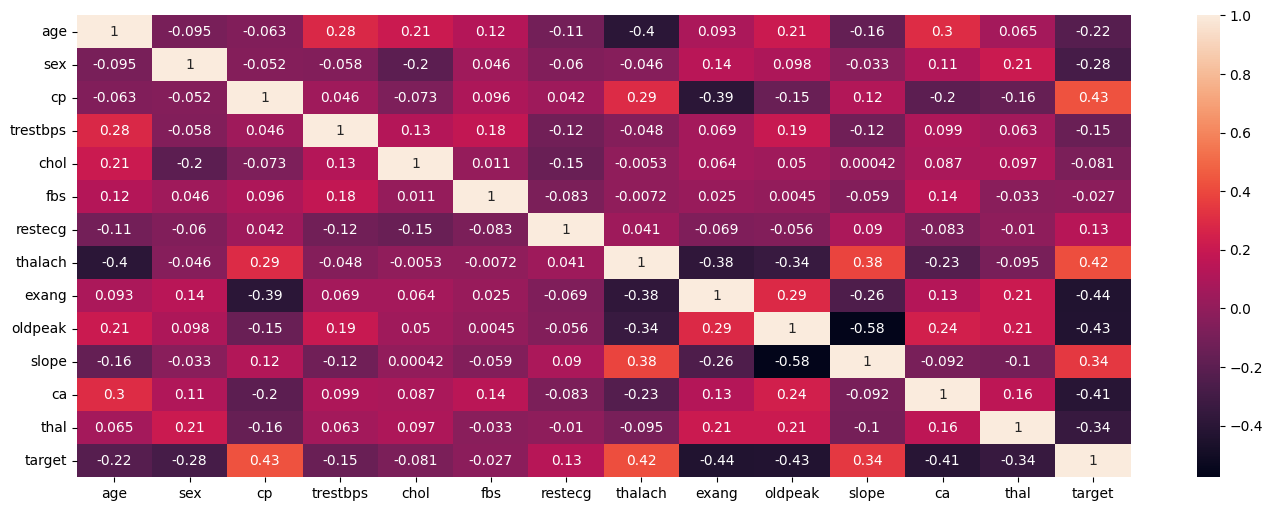

In [24]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot=True)

From the matrix, we can draw inference that 'cp','thalach', and 'slope' shows good positive correlation with target value whereas 'exang','oldpeak','ca','thal','age', and 'sex' shows a good negative correlation with target value and 'fbs', 'chol', 'trestbps' has low correration with target column.

**Checking the number of peoples with or without heart disease:**

In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

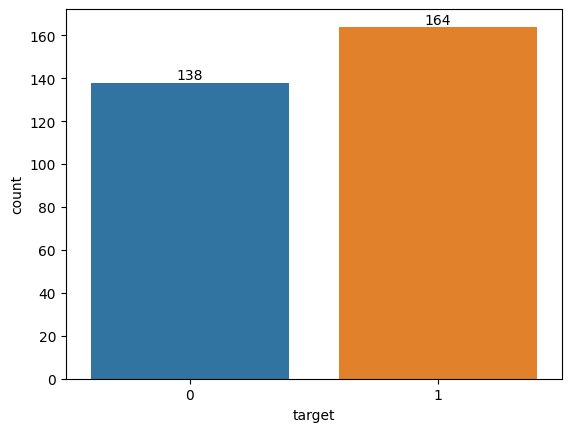

In [27]:
ax = sns.countplot(x=data['target'])
for i in ax.containers:
    ax.bar_label(i,)

From here, we can conclude that more than half of the peoples have heart disease whereas about to half of the peoples don't have heart disease.

**Determining the count of males and females in the dataset:**

In [28]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

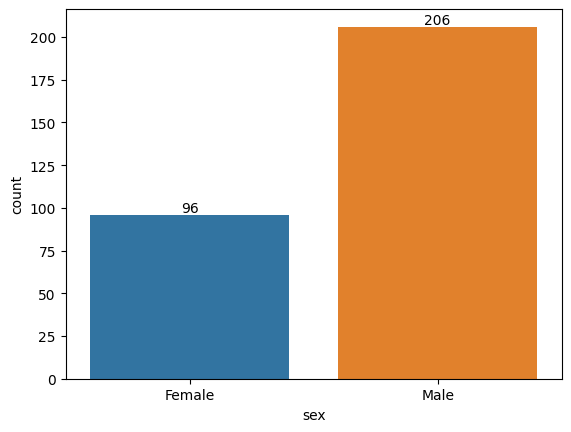

In [30]:
ax=sns.countplot(x=data['sex'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks([0,1],['Female','Male'])
plt.show()

From the above visual, we can draw the inference from the dataset that there are around 70% males and 30 % females, and males have more heart disease than females. 

**Fetching gender distribution according to the target variable:**

In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

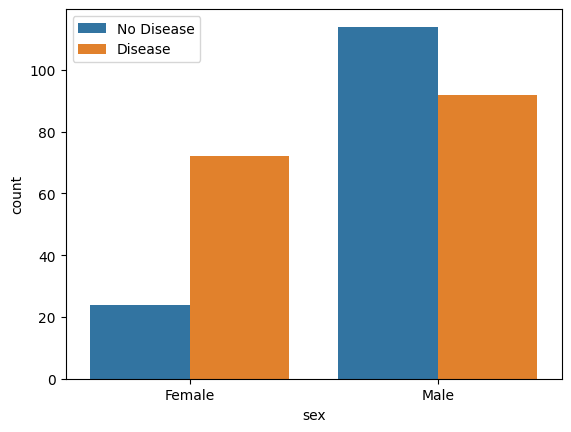

In [32]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

From the above plot, we can observe that there are more males than females in both cases (with disease or without disease).

**Obtaining the age distribution in the dataset:**

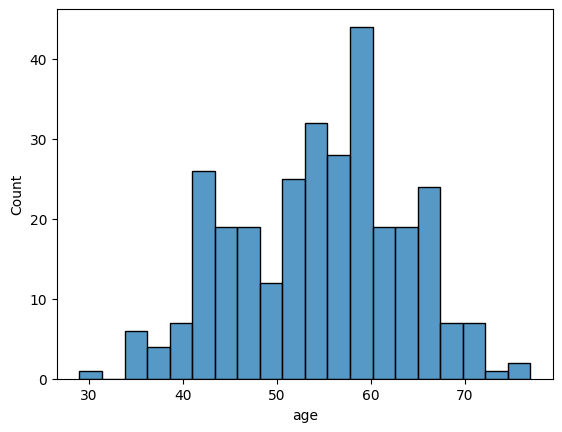

In [33]:
sns.histplot(data['age'], bins=20)
plt.show()

From the above graph, we can see that there are maximum number of peoples that lies under the age distribution of 50-60.

**Checking the Chest Pain Type:**

Chest Pain Type (4 Values)-
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

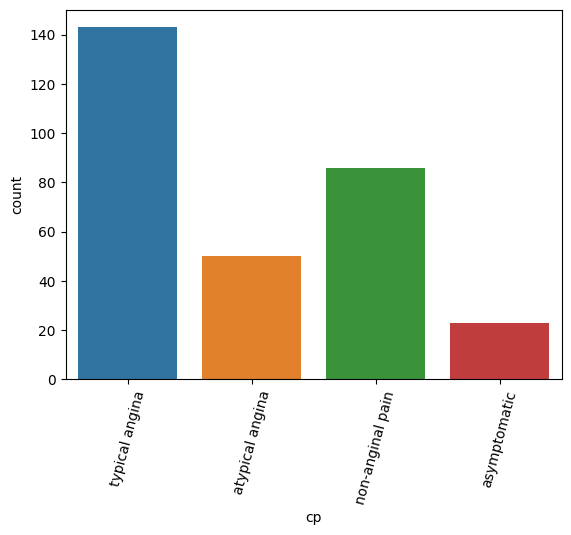

In [34]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation=75)
plt.show()

From the above plot, we can clearly see that chest pain type (0), i.e. **typical angina** is more common among the peoples. 

**Showing the chest pain distribution as per target variable:**

In [36]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

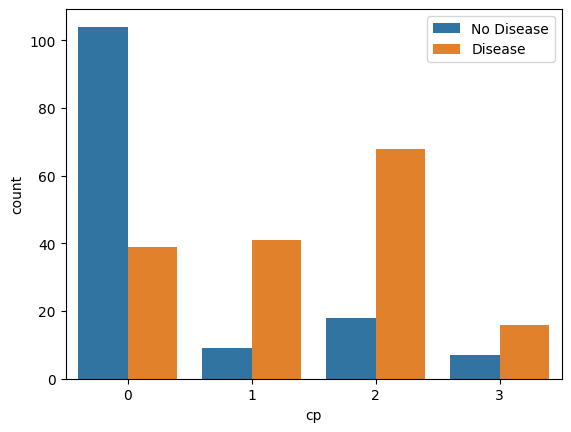

In [37]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No Disease','Disease'])
plt.show()

From the above graph, we can draw the inference that most people have non-anginal chest pain, i.e. chest pain without heart disease. Chest pain can be subjective due to stress, physical activities and many more. It varies between gender.

**Showing the fasting blood sugar distribution according to target variable:**

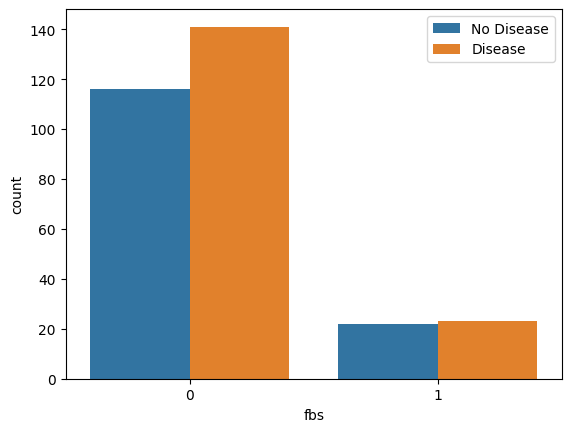

In [38]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No Disease','Disease'])
plt.show()

Here, fbs stands for fasting blood sugar. The peoples having fbs greater than 120 is considered as Dibetic. From the plot, we can see that there are higher number of heart disease patients without diabetes.

**Checking the resting blood pressure distribution:**

In [39]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

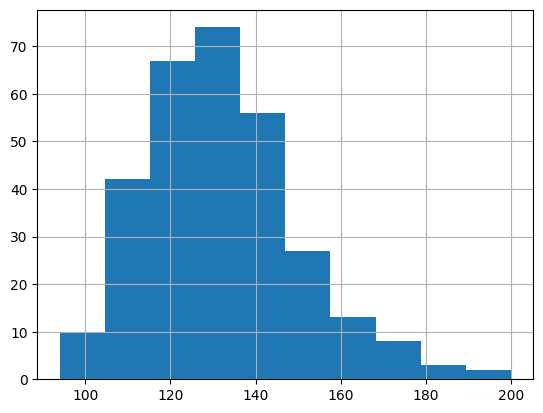

In [40]:
data['trestbps'].hist()

From the above histogram, we can clearly see that the blood pressure of the peoples is between 120 to 130.

**Comparing the resting blood pressure as per sex columm:**

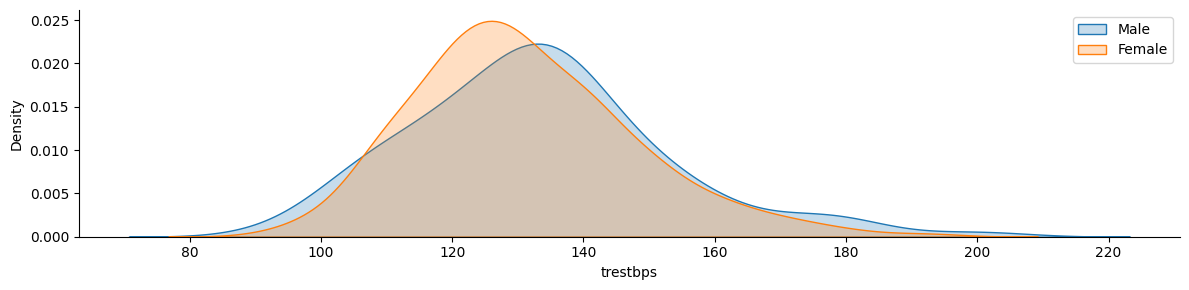

In [41]:
g=sns.FacetGrid(data,hue='sex', aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])
plt.show()

From the above plot, we can observe that the women has lower resting blood pressure as compared to the men. For women, around 120 and for men, little less than 140.

**Showing the distribution of Serum Cholesterol:**

In [43]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

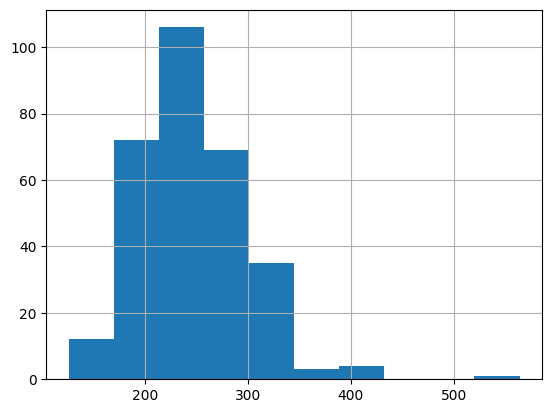

In [44]:
data['chol'].hist()

As we know that the healthy serum cholesterol is less than 200 mg/dl. From the above hist plot, we can draw the conclusion that the serum cholesterol is around 250 mg/dl that is higher than normal.

**Plotting the continuous variables:**

In [45]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [46]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
    

In [47]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [48]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

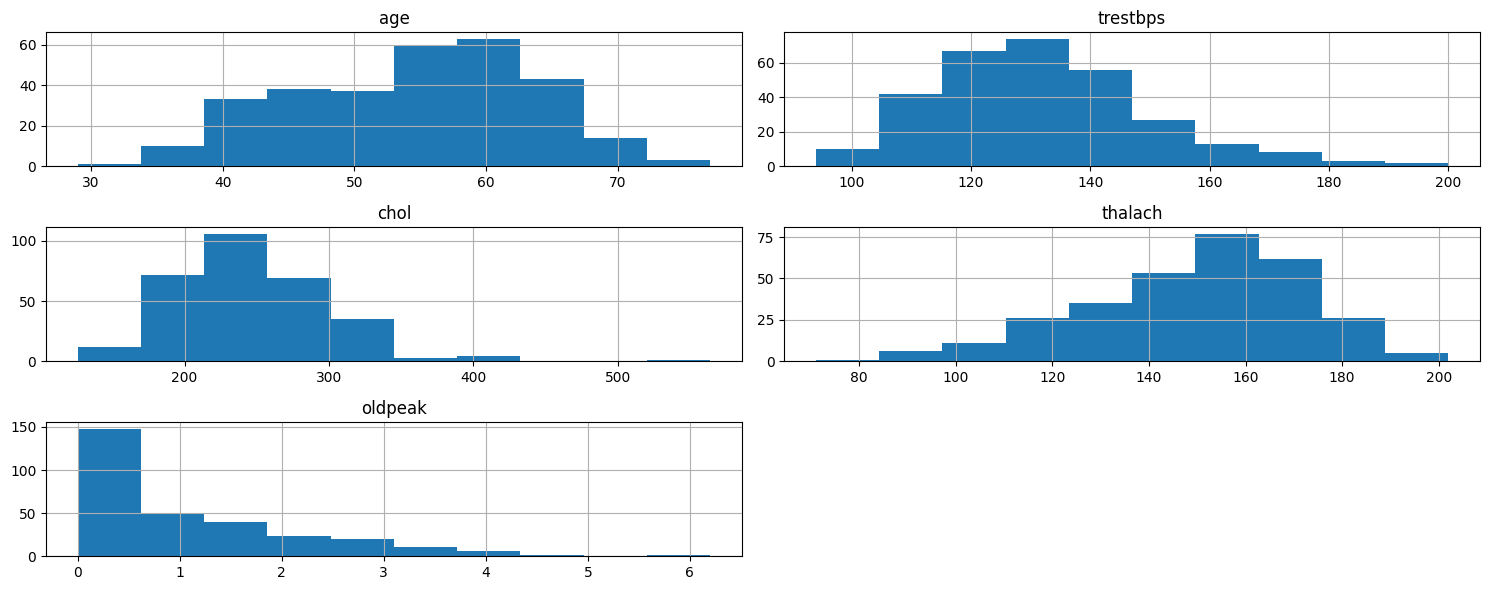

In [49]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

This way, we can show the distribution of continuous variables. From these plots, we can see the normal distribution to the 'age', 'trestbps', and almost to the 'chol' columns whereas the 'oldpeak' column is left-skewed and the 'thalach' column is right-skewed.

**Exporting the final dataset in CSV format to build dashboards in Power BI-**

In [115]:
data.to_csv(r'C:\Users\amans\Desktop\Data Analyst Intern @Unified Mentor\3_Heart Disease Diagnostic Analysis\HeartData.csv', index=False)